<a href="https://colab.research.google.com/github/Savvy-Slowley/Fashion-MNIST-CNN-/blob/main/Fashion_MNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
# Layers for CNN
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# Convert numerical outcome to categorical class
from tensorflow.keras.utils import to_categorical
#Hand written numbers
from tensorflow.keras.datasets import mnist

In [2]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [5]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df.drop(["label"], axis=1).values
y = df.label.values

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [14]:
X_train.shape

(45000, 784)

In [15]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [18]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [19]:
# Sequential model
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])


# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5496 - acc: 0.8092 - val_loss: 0.4506 - val_acc: 0.8415
Epoch 2/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4136 - acc: 0.8561 - val_loss: 0.4132 - val_acc: 0.8546
Epoch 3/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3824 - acc: 0.8689 - val_loss: 0.3615 - val_acc: 0.8739
Epoch 4/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3582 - acc: 0.8746 - val_loss: 0.3634 - val_acc: 0.8743
Epoch 5/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3406 - acc: 0.8817 - val_loss: 0.3477 - val_acc: 0.8759
Epoch 6/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3256 - acc: 0.8858 - val_loss: 0.3288 - val_acc: 0.8854
Epoch 7/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3130 - acc: 0.8903 - val_loss: 0.3324 - val_acc: 0.8801
Epoch 8/20
1407/1407 [==============================] -

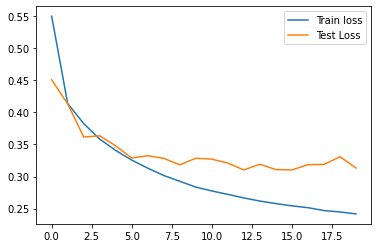

In [20]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

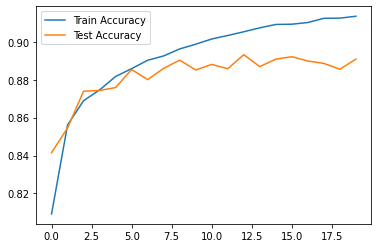

In [21]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();